<a href="https://colab.research.google.com/github/juacastanori/SyS/blob/main/SLIT_Rta_Impulso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicios respuesta impluso
##Juan Jerónimo Castaño Rivera - 2024

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x)#definir ecuacion en simpy con operador diferencial diff
ode

       d              
y(t) + ──(y(t)) = x(t)
       dt             

In [ ]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))#resolver edo ante entrada x(t)
#se definin condiciones iniciales 0
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

       ⎛        -t     ⎞  -t
y(t) = ⎝θ(t) - ℯ  ⋅θ(t)⎠⋅ℯ  

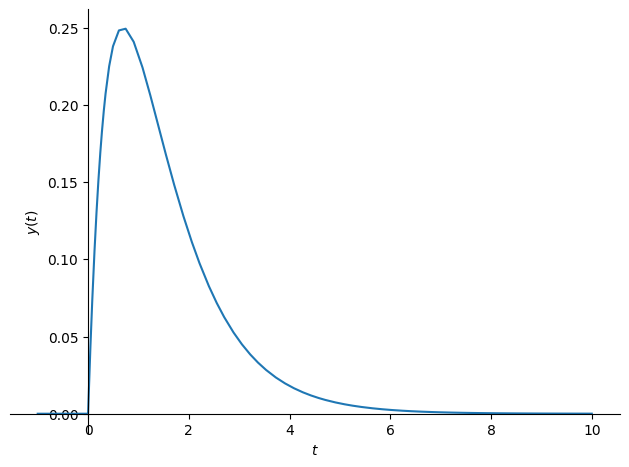

In [ ]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');

In [ ]:
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))#resolver para delta dirac
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h

        -t     
h(t) = ℯ  ⋅θ(t)

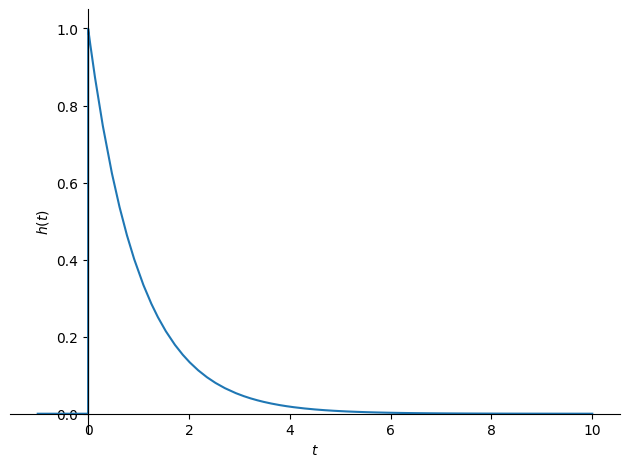

In [ ]:
sym.plot(h.rhs, (t,-1,10), ylabel=r'$h(t)$');

In [ ]:
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2

 -t    -2⋅t
ℯ   - ℯ    

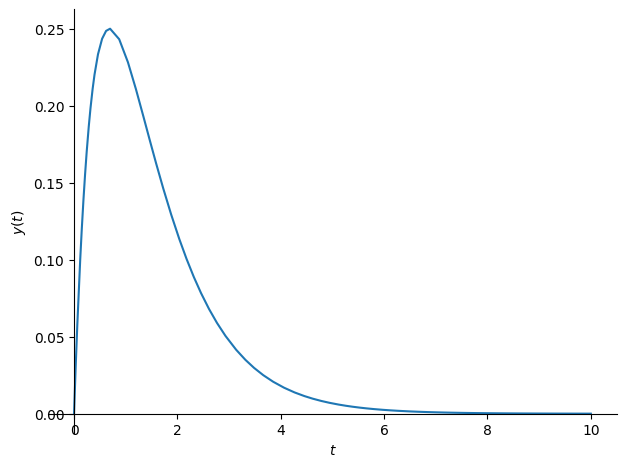

In [ ]:
sym.plot(y2, (t,0,10), ylabel=r'$y(t)$');

**Ejercicio**


* Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?

Las dos señales son iguales. Por lo visto en clase, resolver la ecuación diferencial con la entrada deseada, da igual a resolver esta ecuación diferencial con entrada $δ(t)$. De ahí se obtiene la respuesta impulso, la cual se le hace convolución con la entrada deseada.

* Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.

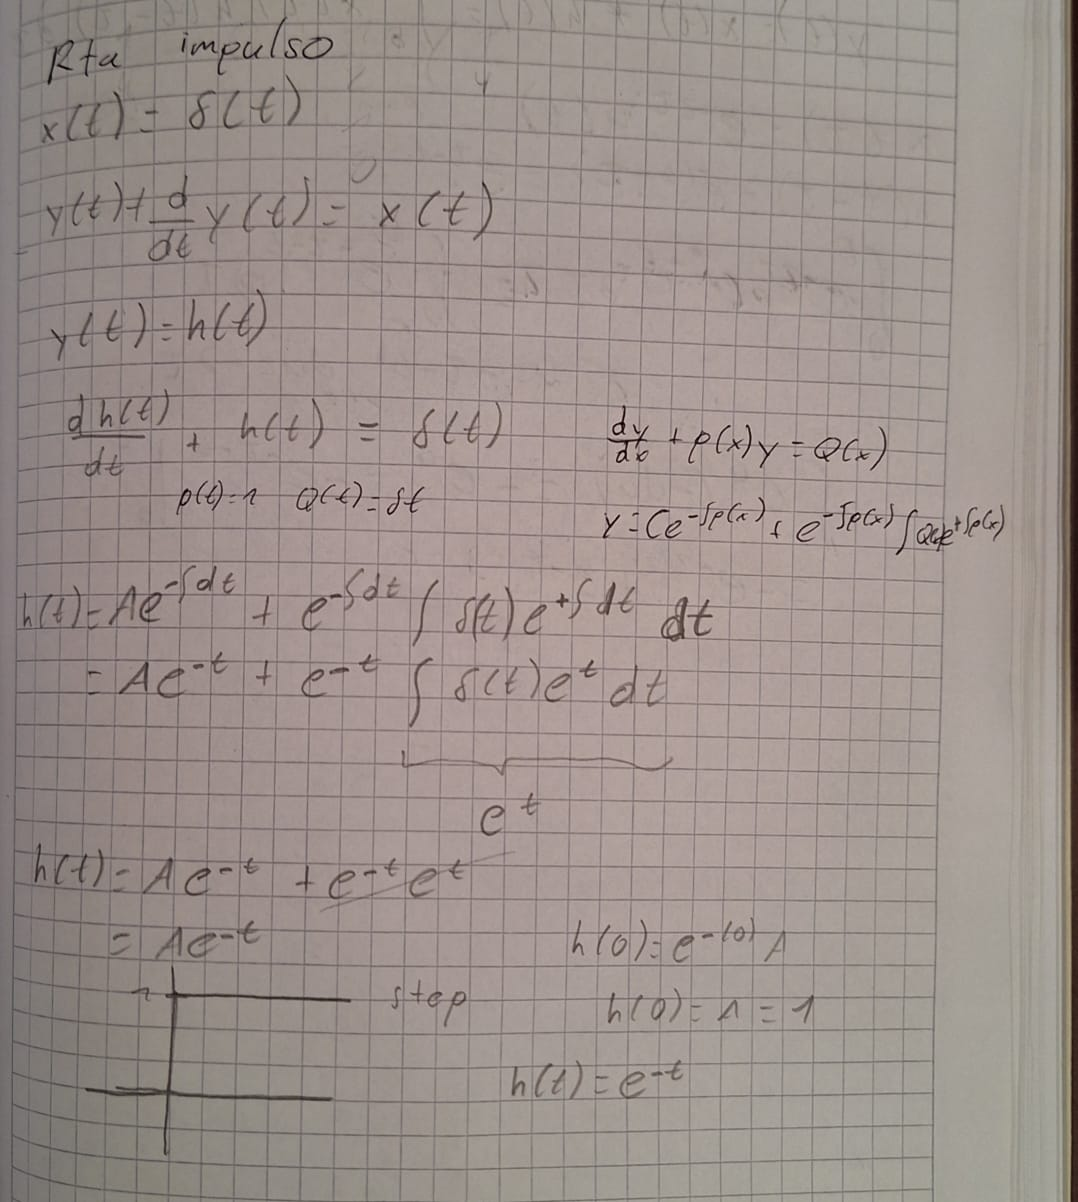

* Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.

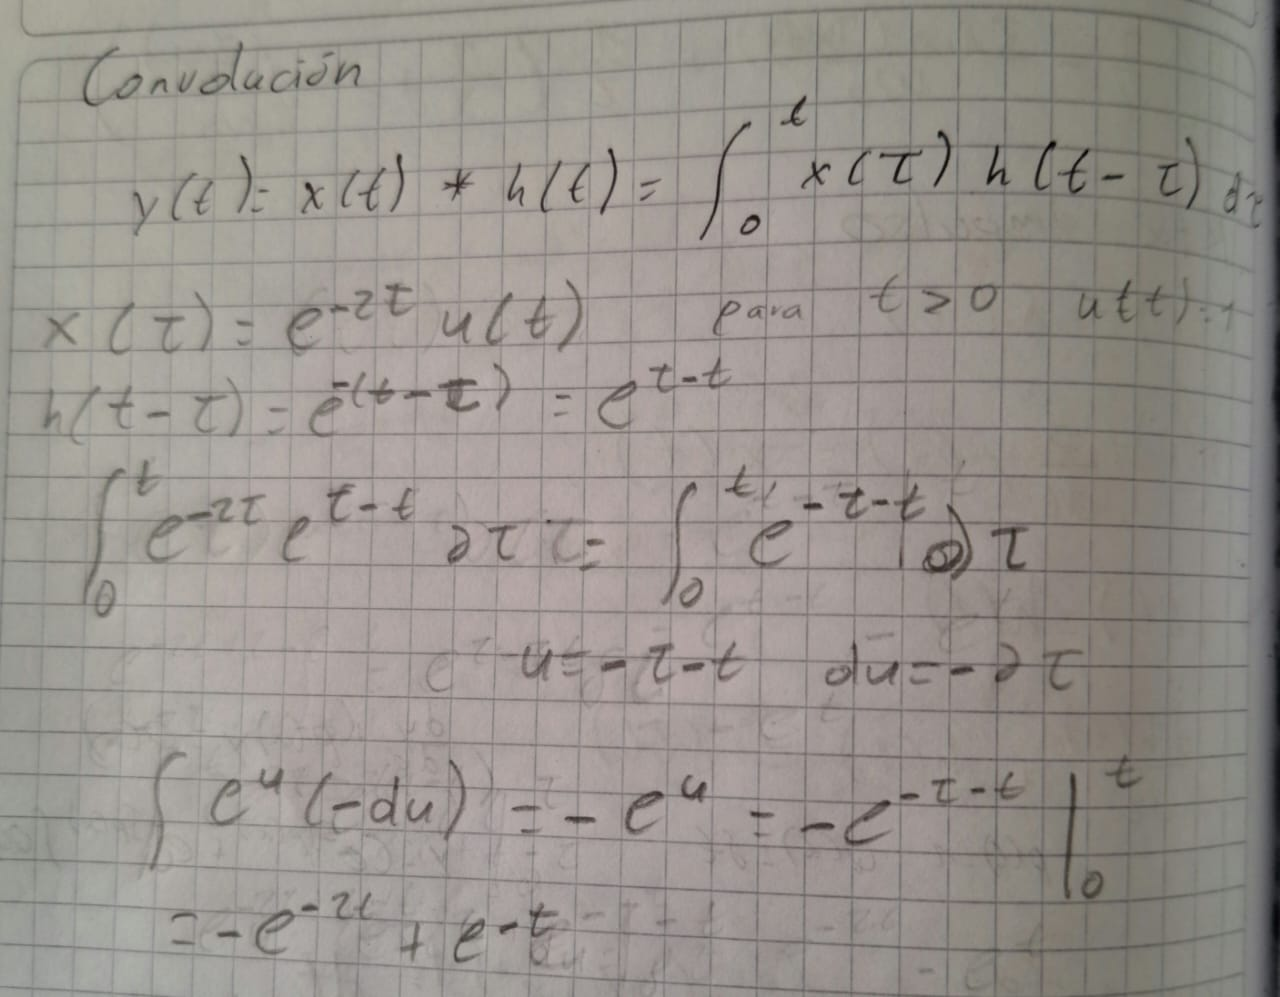